# Prim's Algorithm on the 5

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter
import time
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#read all csvs
df1 = pd.read_csv("/content/drive/MyDrive/cleaned algo data sets/soc-sign-bitcoinalpha_cleaned.csv")
df2 = pd.read_csv("/content/drive/MyDrive/cleaned algo data sets/soc-sign-bitcoinotc_cleaned.csv")
df3 = pd.read_csv("/content/drive/MyDrive/cleaned algo data sets/soc-advogato_cleaned.csv")
df4 = pd.read_csv("/content/drive/MyDrive/cleaned algo data sets/soc-epinions_cleaned.csv")
df5 = pd.read_csv("/content/drive/MyDrive/cleaned algo data sets/soc-livemocha_cleaned.csv")

In [4]:
#dict to store running time
running_time = {}
nodes = {}
edges = {}

In [5]:
def create_tree(df, name):
    # Create an undirected graph
    G = nx.Graph()

    # Add edges with weights
    for _, row in df.iterrows():
        G.add_edge(int(row['source']), int(row['target']), weight=row['weight'])

    # Start timing
    start_time = time.time()

    # Apply Prim's algorithm to find the MST
    mst = nx.minimum_spanning_tree(G, algorithm='prim')

    # End timing
    end_time = time.time()
    execution_time = end_time - start_time

    # Store info in dicts
    running_time[name] = execution_time
    nodes[name] = len(mst.nodes())
    edges[name] = len(mst.edges())

    # Print execution time
    print(f"Execution time for Prim's algorithm: {execution_time:.4f} seconds")

    # Print MST info
    total_weight = 0
    for _, _, data in mst.edges(data=True):
        weight = data['weight']
        total_weight += weight
    print(f"\nTotal MST Weight: {total_weight}")
    print(f"Total MST Edges: {len(mst.edges)}")
    print(f"Total Nodes: {len(mst.nodes)}")
    return G, mst

def create_animation(G, mst, name):
    # Animation setup
    fig, ax = plt.subplots(figsize=(10, 8))
    pos = nx.spring_layout(G)  # Layout for all nodes
    nx.draw_networkx_nodes(G, pos, node_color='pink', node_size=5, ax=ax)
    edge_trace = nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.3, ax=ax)

    # Get MST edges and sort by weight for animation (approximating Prim's order)
    mst_edges = list(mst.edges(data=True))
    mst_edges.sort(key=lambda x: x[2]['weight'])  # Sort by edge weight
    total_edges = len(mst_edges)
    total_nodes = len(mst.nodes)

    # Define frames based on 5% increments of nodes
    frames = 20  # 20 frames for 5% each
    frame_edges = [int((i * total_edges + total_edges - 1) // frames) for i in range(frames + 1)]  # Ensure last frame includes all edges

    # Animation function
    def update(frame):
        ax.clear()
        nx.draw_networkx_nodes(G, pos, node_color='pink', node_size=5, ax=ax)
        current_edge_idx = frame_edges[frame]
        nx.draw_networkx_edges(G, pos, edgelist=[e[:2] for e in mst_edges[:current_edge_idx]], edge_color='midnightblue', width=2, ax=ax)
        nx.draw_networkx_edges(G, pos, edgelist=[e[:2] for e in mst_edges[current_edge_idx:]], edge_color='gray', alpha=0.3, ax=ax)
        # Calculate cumulative weight up to the current frame
        cumulative_weight = sum(edge[2]['weight'] for edge in mst_edges[:current_edge_idx])
        percentage = (frame + 1) * (100 / frames)  # e.g., frame 0 = 5%, frame 1 = 10%, ..., frame 19 = 100%
        ax.set_title(f'MST Formation - {percentage:.0f}% (~{(frame + 1) * total_nodes // 20} nodes)\nTotal Weight Added: {cumulative_weight:.2f}')
        return ax

    # Create animation
    ani = FuncAnimation(fig, update, frames=len(frame_edges)-1, interval=2000, blit=False)

    # Save animation as video
    writer = FFMpegWriter(fps=0.5, metadata=dict(artist='Me'), bitrate=1800)
    ani.save(f'mst_animation_{name}.mp4', writer=writer)

    plt.close()  # Close the figure to free memory



## soc-sign-bitcoinalpha


*   3,783 nodes
*   24,186 edges



In [6]:
G, mst = create_tree(df1, 'alpha')
create_animation(G, mst, 'alpha')

Execution time for Prim's algorithm: 0.2220 seconds

Total MST Weight: -1244
Total MST Edges: 3778
Total Nodes: 3783


## soc-sign-bitcoinotc

* 5,881 nodes
* 35,592 edges

In [7]:
G,mst=create_tree(df2,'bitcoin')
create_animation(G, mst, 'bitcoin')

Execution time for Prim's algorithm: 0.6588 seconds

Total MST Weight: -5174
Total MST Edges: 5877
Total Nodes: 5881


## soc-advogato


*   6,551 nodes
*   51,332 edges



In [8]:
G,mst=create_tree(df3,'advogato')
create_animation(G, mst, 'advogato')

Execution time for Prim's algorithm: 0.8479 seconds

Total MST Weight: 3562.7999999999083
Total MST Edges: 5110
Total Nodes: 6551


## soc-epinions
* 26,588 nodes
* 100,122 edges

In [9]:
G,mst=create_tree(df4,"epinions")
create_animation(G, mst, 'epinions')

Execution time for Prim's algorithm: 1.5238 seconds

Total MST Weight: 26587
Total MST Edges: 26587
Total Nodes: 26588


## soc-LiveMocha
* 104,103 nodes
* 2,193,083 edges

In [10]:

#take a 10% sample of the mst because the dataset is too large

def create_animation_sampled(mst, name):
    # Animation setup
    fig, ax = plt.subplots(figsize=(10, 8))

    # Get MST edges and sort by weight for animation (approximating Prim's order)
    mst_edges = list(mst.edges(data=True))
    mst_edges.sort(key=lambda x: x[2]['weight'])  # Sort by weight
    total_edges = len(mst_edges)

    # Take the first 10% of edges
    sample_size = max(1, int(0.1 * total_edges))  # 10% sample, ensure at least 1 edge
    sampled_edges = mst_edges[:sample_size]

    # Create a sampled MST graph with only the sampled edges and their nodes
    sampled_mst = nx.Graph()
    sampled_mst.add_edges_from((e[0], e[1], e[2]) for e in sampled_edges)

    # Use sampled_mst for layout and drawing
    pos = nx.spring_layout(sampled_mst)
    nx.draw_networkx_nodes(sampled_mst, pos, node_color='pink', node_size=5, ax=ax)

    # Define frames based on 5% increments of the sampled edges
    frames = 20  # 20 frames for 5% each
    frame_edges = [int((i * sample_size + sample_size - 1) // frames) for i in range(frames + 1)]  # Ensure last frame includes all sampled edges

    # Animation function
    def update(frame):
        ax.clear()
        # Draw nodes and edges up to the current frame
        current_edge_idx = frame_edges[frame]
        current_edges = sampled_edges[:current_edge_idx]
        future_edges = sampled_edges[current_edge_idx:]

        # Create temporary graph for current frame to get nodes
        temp_graph = nx.Graph()
        temp_graph.add_edges_from((e[0], e[1]) for e in current_edges)
        current_nodes = list(temp_graph.nodes())

        # Draw nodes
        nx.draw_networkx_nodes(sampled_mst, pos, nodelist=current_nodes, node_color='pink', node_size=5, ax=ax)

        # Draw edges
        nx.draw_networkx_edges(sampled_mst, pos, edgelist=[e[:2] for e in
        current_edges], edge_color='midnightblue', width=2, ax=ax)
        nx.draw_networkx_edges(sampled_mst, pos, edgelist=[e[:2] for e in future_edges], edge_color='gray', alpha=0.3, ax=ax)

        # Calculate cumulative weight and percentage
        cumulative_weight = sum(edge[2]['weight'] for edge in current_edges)
        percentage = (frame + 1) * (100 / frames)  # e.g., frame 0 = 5%, frame 1 = 10%, ..., frame 19 = 100%
        ax.set_title(f'MST Formation - {percentage:.0f}% (~{len(current_nodes)} nodes)\nTotal Weight Added: {cumulative_weight:.2f}')
        return ax,

    # Create animation
    ani = FuncAnimation(fig, update, frames=len(frame_edges)-1, interval=2000, blit=False)

    # Save animation as video
    writer = FFMpegWriter(fps=0.5, metadata=dict(artist='Me'), bitrate=1800)
    ani.save(f'mst_animation_{name}.mp4', writer=writer)

    plt.close()  # Close the figure to free memory

G,mst=create_tree(df5, 'LiveMocha')
create_animation_sampled(mst, 'LiveMocha')

Execution time for Prim's algorithm: 24.7036 seconds

Total MST Weight: 104102
Total MST Edges: 104102
Total Nodes: 104103


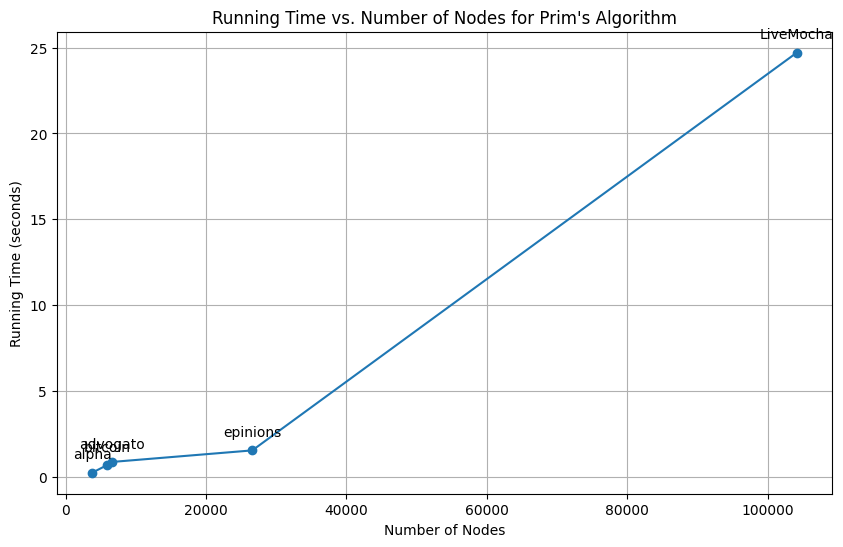

In [11]:
# Prepare data for plotting
names = list(running_time.keys())
times = list(running_time.values())
num_nodes = list(nodes.values())

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(num_nodes, times, marker='o', linestyle='-')
plt.xlabel('Number of Nodes')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time vs. Number of Nodes for Prim\'s Algorithm')
plt.grid(True)

# Add labels for each point
for i, txt in enumerate(names):
    plt.annotate(txt, (num_nodes[i], times[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

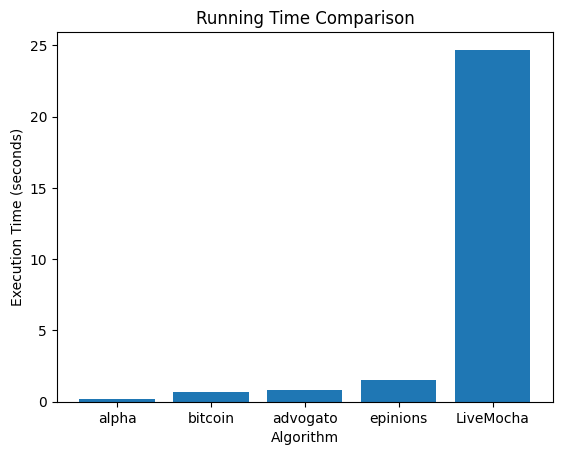

In [12]:
#plot running times
plt.bar(running_time.keys(), running_time.values())
plt.xlabel('Algorithm')
plt.ylabel('Execution Time (seconds)')
plt.title('Running Time Comparison')
plt.show()

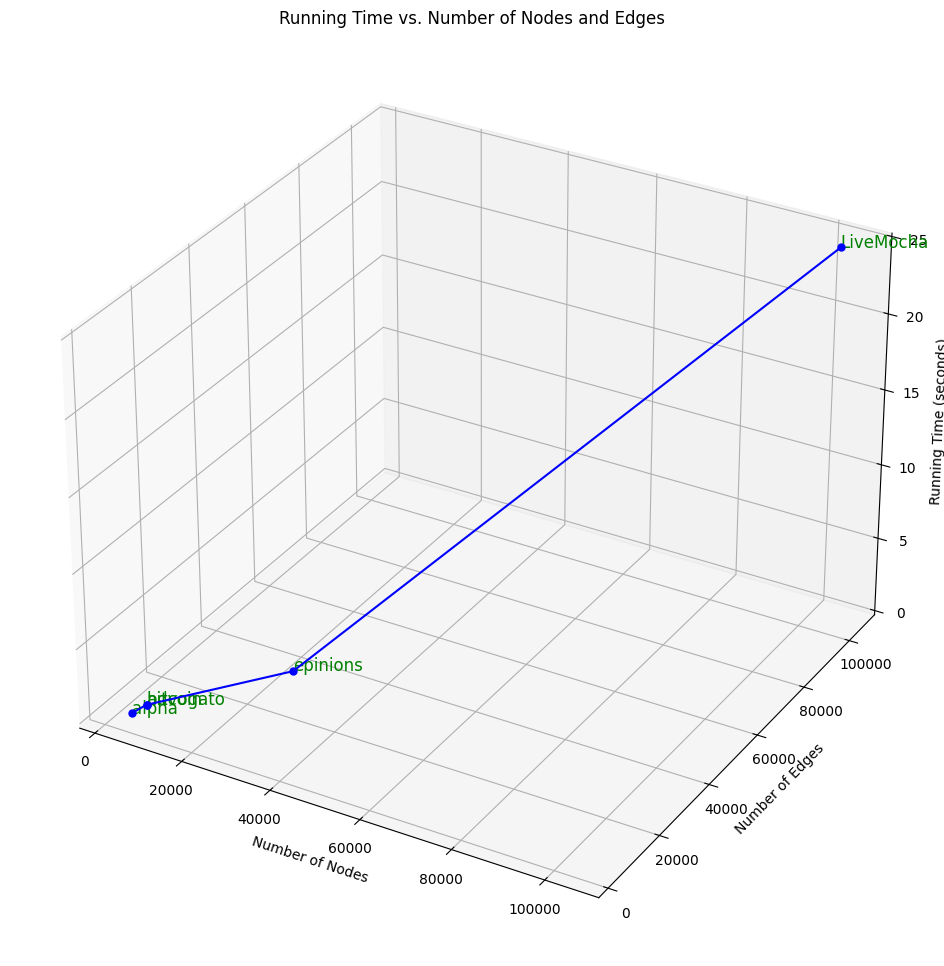

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Get the number of nodes, edges, and running times
nodes_list = list(nodes.values())
edges_list = list(edges.values())
times_list = list(running_time.values())
labels = list(running_time.keys())

# Create a 3D plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot lines connecting the data points
ax.plot(nodes_list, edges_list, times_list, c='b', marker='o', markersize=5)

# Label the points
for i, label in enumerate(labels):
    ax.text(nodes_list[i], edges_list[i], times_list[i], label, size=12, zorder=1, color='green')

# Set labels and title
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Number of Edges')
ax.set_zlabel('Running Time (seconds)')
ax.set_title('Running Time vs. Number of Nodes and Edges')

plt.show()